## Setting Up:

In [1]:
import pandas as pd
import os
import warnings
from tqdm.notebook import tqdm
import zipfile
import cdsapi
import numpy as np
import glob
import xarray as xr

from scripts.config_FR import *

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

## Download monthly ERA5-Land variables:

To download ERA5-Land data you need to configure your API client first. For this, follow these instructions: https://forum.ecmwf.int/t/step-by-step-instructions-on-how-to-download-data-using-new-climate-data-store-beta-cds-beta/3743. 

To summarize instructions: 
- Your existing CDS credentials will not work in CDS-Beta, you need to have an ECMWF account - register one here: https://www.ecmwf.int/. 
- Once you have set up an account, make sure that you accepted licences in the Download form of the product page: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land-monthly-means?tab=download. 
- Make sure that you are logged in ECMWF then navigate to the CDSAPI setup page to copy the content for your .cdsapirc file: https://cds.climate.copernicus.eu/how-to-api. 

Once this is set up, you should be able to download the ERA5-Land data using our script. 

In [2]:
RUN = True
if RUN:
    os.makedirs(path_ERA5_raw, exist_ok=True)
    c = cdsapi.Client()

    # climate variables
    c.retrieve(
        'reanalysis-era5-land-monthly-means', {
            'product_type': ['monthly_averaged_reanalysis'],
            'variable': [
                '10m_u_component_of_wind',
                '10m_v_component_of_wind',
                '2m_temperature',
                'forecast_albedo',
                'snow_cover',
                'snow_density',
                'snow_depth_water_equivalent',
                'snowfall',
                'snowmelt',
                'surface_latent_heat_flux',
                'surface_net_thermal_radiation',
                'surface_sensible_heat_flux',
                'surface_solar_radiation_downwards',
                'total_precipitation',
            ],
            'year': [
                '1950',
                '1951',
                '1952',
                '1953',
                '1954',
                '1955',
                '1956',
                '1957',
                '1958',
                '1959',
                '1960',
                '1961',
                '1962',
                '1963',
                '1964',
                '1965',
                '1966',
                '1967',
                '1968',
                '1969',
                '1970',
                '1971',
                '1972',
                '1973',
                '1974',
                '1975',
                '1976',
                '1977',
                '1978',
                '1979',
                '1980',
                '1981',
                '1982',
                '1983',
                '1984',
                '1985',
                '1986',
                '1987',
                '1988',
                '1989',
                '1990',
                '1991',
                '1992',
                '1993',
                '1994',
                '1995',
                '1996',
                '1997',
                '1998',
                '1999',
                '2000',
                '2001',
                '2002',
                '2003',
                '2004',
                '2005',
                '2006',
                '2007',
                '2008',
                '2009',
                '2010',
                '2011',
                '2012',
                '2013',
                '2014',
                '2015',
                '2016',
                '2017',
                '2018',
                '2019',
                '2020',
                '2021',
                '2022',
                '2023',
                '2024',
            ],
            'month': [
                '01',
                '02',
                '03',
                '04',
                '05',
                '06',
                '07',
                '08',
                '09',
                '10',
                '11',
                '12',
            ],
            'time': ['00:00'],
            "data_format":
            "netcdf",
            "download_format":
            "zip",
            'area': [
                50,
                0,
                45,
                20,
            ],
        }, path_ERA5_raw + 'download.netcdf.zip')
    with zipfile.ZipFile(path_ERA5_raw + 'download.netcdf.zip', 'r') as zip:
        zip.extractall(path_ERA5_raw)

    # geopotential pressure (old too low resolution)
    # c.retrieve(
    #     "reanalysis-era5-single-levels", {
    #         "product_type": ["reanalysis"],
    #         "variable": ["geopotential"],
    #         "year": ["2024"],
    #         "month": ["06"],
    #         "day": ["01"],
    #         "time": ["12:00"],
    #         "data_format": "netcdf",
    #         'area': [
    #             50,
    #             0,
    #             45,
    #             20,
    #         ]
    #     }, path_ERA5_raw + 'era5_geopotential_pressure.nc')
    
    # geopot from era5-land reanalysis directly (new product with better resolution)
    # download it separately so that the pipeline still works
    c.retrieve(
        'reanalysis-era5-land-monthly-means', {
            "variable": ["geopotential"],
            "data_format": "netcdf",
            "download_format": "zip",
            'area': [
                50,
                0,
                45,
                20,
            ]
        }, path_ERA5_raw + 'download_geopot.netcdf.zip')
    with zipfile.ZipFile(path_ERA5_raw + 'download_geopot.netcdf.zip', 'r') as zip:
        zip.extractall(path_ERA5_raw)

2025-05-12 11:49:25,563 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-05-12 11:49:25,564 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-05-12 11:49:26,007 INFO Request ID is 850ca27c-2018-46c4-b1a6-d2bf5caa1e4d
2025-05-12 11:49:26,063 INFO status has been updated to accepted
2025-05-12 11:49:47,660 INFO status has been updated to running
2025-05-12 11:49:59,104 INFO status has been updated to successful


6047379c0db16d8b57d8f328cf963b2f.zip:   0%|          | 0.00/262M [00:00<?, ?B/s]

2025-05-12 11:50:06,813 INFO Request ID is a32354bd-1f61-475a-ba9a-c951f5d37500
2025-05-12 11:50:06,855 INFO status has been updated to accepted
2025-05-12 11:50:20,237 INFO status has been updated to successful


be114cf6ee3bc345e3bf619b9b7775da.zip:   0%|          | 0.00/90.1k [00:00<?, ?B/s]

In [3]:
! ls "{path_ERA5_raw}"

data_stream-moda.nc	       era5_geopotential_pressure_scratch.nc
download_geopot.netcdf.zip     era5_monthly_averaged_data.nc
download.netcdf.zip	       era5_monthly_averaged_data_scratch.nc
era5_geopotential_pressure.nc  geo.area-subset.50.20.45.0.nc


In [4]:
# Correct era5 data
dc = xr.open_dataset(path_ERA5_raw + 'data_stream-moda.nc')
dc2 = dc.rename(
    {'valid_time': 'time'}
)  # Coordinates have changed recently in the API, this is to keep compatibility with our code

# delete file if already exists
if os.path.exists(path_ERA5_raw + 'era5_monthly_averaged_data.nc'):
    os.remove(path_ERA5_raw + 'era5_monthly_averaged_data.nc')
dc2.to_netcdf(path_ERA5_raw + "era5_monthly_averaged_data.nc")

# change name of geopotential file: 
dc = xr.open_dataset(path_ERA5_raw + 'geo.area-subset.50.20.45.0.nc')
# delete file if already exists
if os.path.exists(path_ERA5_raw + 'era5_geopotential_pressure.nc'):
    os.remove(path_ERA5_raw + 'era5_geopotential_pressure.nc')
dc.to_netcdf(path_ERA5_raw + "era5_geopotential_pressure.nc")

# delete old files
os.remove(path_ERA5_raw + 'download.netcdf.zip')
os.remove(path_ERA5_raw + 'data_stream-moda.nc')
os.remove(path_ERA5_raw+'download_geopot.netcdf.zip')
os.remove(path_ERA5_raw+'geo.area-subset.50.20.45.0.nc')

In [5]:
! ls "{path_ERA5_raw}"

era5_geopotential_pressure.nc	       era5_monthly_averaged_data.nc
era5_geopotential_pressure_scratch.nc  era5_monthly_averaged_data_scratch.nc


### Check geopotential data:

In [8]:
geopot_era5 = xr.open_dataset(path_ERA5_raw + 'era5_geopotential_pressure.nc')
display(geopot_era5)

display(xr.open_dataset(path_ERA5_raw + 'era5_monthly_averaged_data.nc'))

<xarray.Dataset> Size: 83kB
Dimensions:    (time: 1, latitude: 51, longitude: 201)
Coordinates:
  * longitude  (longitude) float32 804B 0.0 0.1 0.2 0.3 ... 19.7 19.8 19.9 20.0
  * latitude   (latitude) float32 204B 50.0 49.9 49.8 49.7 ... 45.2 45.1 45.0
  * time       (time) datetime64[ns] 8B 2013-08-09T12:00:00
Data variables:
    z          (time, latitude, longitude) float64 82kB ...
Attributes:
    Conventions:               CF-1.6
    history:                   Fri Jun 12 14:41:56 2020: ncpdq -U geo_1279l4_...
    NCO:                       4.7.2
    nco_openmp_thread_number:  1

<xarray.Dataset> Size: 517MB
Dimensions:    (time: 900, latitude: 51, longitude: 201)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-12-01
  * latitude   (latitude) float64 408B 50.0 49.9 49.8 49.7 ... 45.2 45.1 45.0
  * longitude  (longitude) float64 2kB 0.0 0.1 0.2 0.3 ... 19.7 19.8 19.9 20.0
    expver     (time) <U4 14kB ...
Data variables: (12/14)
    u10        (time, latitude, longitude) float32 37MB ...
    v10        (time, latitude, longitude) float32 37MB ...
    t2m        (time, latitude, longitude) float32 37MB ...
    fal        (time, latitude, longitude) float32 37MB ...
    snowc      (time, latitude, longitude) float32 37MB ...
    rsn        (time, latitude, longitude) float32 37MB ...
    ...         ...
    smlt       (time, latitude, longitude) float32 37MB ...
    slhf       (time, latitude, longitude) float32 37MB ...
    str        (time, latitude, longitude) float32 37MB ...
    sshf       (time, latitude, longitude) float32 37MB ...
    ssrd       (time, latitude, longitude) float32 37MB ...
    tp         (time, latitude, longitude) float32 37MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-07T14:57 GRIB to CDM+CF via cfgrib-0.9.1...

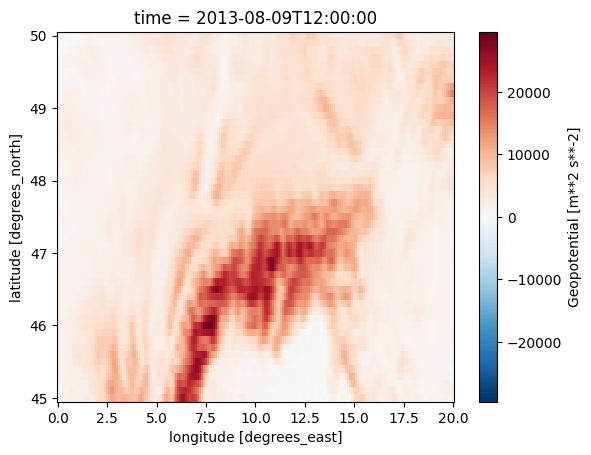

In [9]:
# plot geopot new
geopot_era5.z.plot()

In [10]:
# Get central latitude (mean of latitude values)
latitude_center = geopot_era5.latitude.values.mean()

# Earth's approximate conversion factor (meters per degree)
meters_per_degree_latitude = 111320  # Roughly constant for latitude
meters_per_degree_longitude = 111320 * np.cos(
    np.radians(latitude_center))  # Adjust for longitudegitude

# Compute resolution
dx_m = np.round(
    abs(geopot_era5.longitude[1] - geopot_era5.longitude[0]).values * meters_per_degree_longitude, 3)
dy_m = np.round(
    abs(geopot_era5.latitude[1] - geopot_era5.latitude[0]).values * meters_per_degree_latitude, 3)
print(f"Cell size of grid: {dx_m:.2f} x {dy_m:.2f} meters")

Cell size of grid: 7520.67 x 11131.83 meters
